# Ejercicio 8.2

#### Interfaz de Usuario y casos de Uso

<img src="Interfaz.png" width="300">

#### Diagrama de Clases

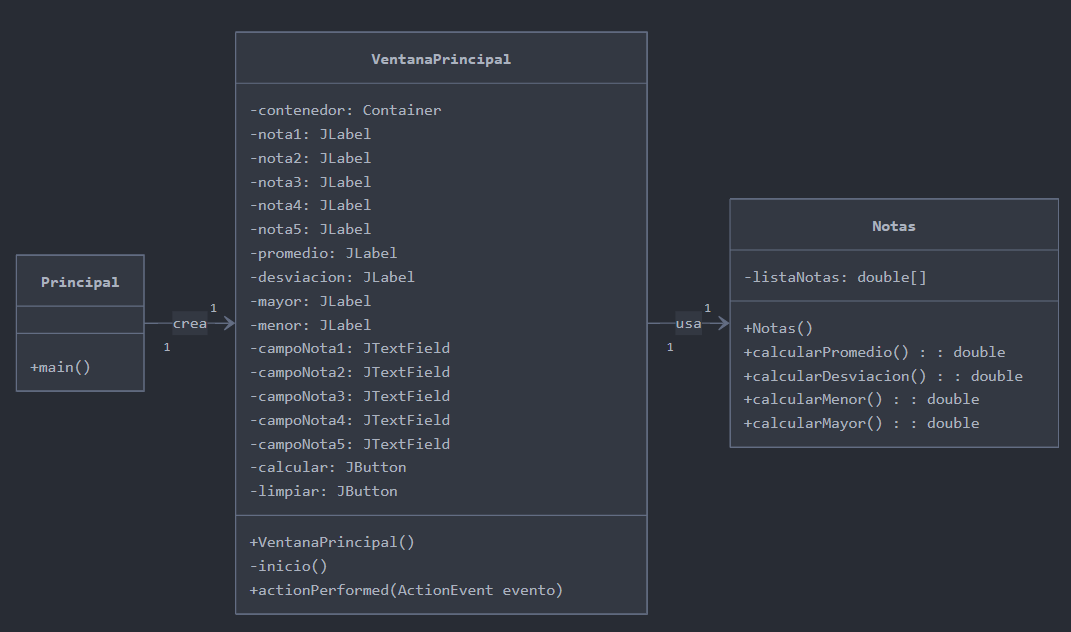

#### Codigo

In [4]:
import tkinter as tk
from tkinter import messagebox
import math

def calcular_estadisticas(notas):
    try:
        notas_float = [float(nota) for nota in notas]
        
        suma_para_promedio = sum(notas_float[1:])
        promedio = suma_para_promedio / len(notas_float)
        
        suma_para_desviacion = 0
        for nota in notas_float:
            suma_para_desviacion += (nota - promedio) ** 2
        
        desviacion = math.sqrt(suma_para_desviacion / len(notas_float))
        
        mayor = max(notas_float)
        menor = min(notas_float)
        
        return {
            "promedio": promedio,
            "desviacion": desviacion,
            "mayor": mayor,
            "menor": menor
        }
    except ValueError:
        return None

def on_calcular():
    entradas = [entry.get() for entry in entries_notas]
    
    if any(not entrada for entrada in entradas):
        messagebox.showerror("Error de entrada", "Por favor, ingrese todas las cinco notas.")
        return
        
    resultados = calcular_estadisticas(entradas)
    
    if resultados is None:
        messagebox.showerror("Error de entrada", "Por favor, ingrese solo números válidos.")
    else:
        lbl_promedio.config(text=f"Promedio = {resultados['promedio']:.2f}")
        lbl_desviacion.config(text=f"Desviación estándar = {resultados['desviacion']:.2f}")
        lbl_mayor.config(text=f"Valor mayor = {resultados['mayor']:.1f}")
        lbl_menor.config(text=f"Valor menor = {resultados['menor']:.1f}")

def on_limpiar():
    for entry in entries_notas:
        entry.delete(0, tk.END)
    
    lbl_promedio.config(text="Promedio =")
    lbl_desviacion.config(text="Desviación estándar =")
    lbl_mayor.config(text="Valor mayor =")
    lbl_menor.config(text="Valor menor =")

ventana = tk.Tk()
ventana.title("Notas")
ventana.iconbitmap('Calculadora.ico')
ventana.geometry("280x380")
ventana.resizable(False, False)

entries_notas = []
for i in range(5):
    y_pos = 20 + i * 30 
    label = tk.Label(ventana, text=f"Nota {i+1}:")
    label.place(x=20, y=y_pos)
    entry = tk.Entry(ventana, width=22)
    entry.place(x=105, y=y_pos)
    entries_notas.append(entry)

btn_calcular = tk.Button(ventana, text="Calcular", width=12, command=on_calcular)
btn_calcular.place(x=35, y=180)

btn_limpiar = tk.Button(ventana, text="Limpiar", width=12, command=on_limpiar)
btn_limpiar.place(x=145, y=180)

lbl_promedio = tk.Label(ventana, text="Promedio =")
lbl_promedio.place(x=20, y=220)

lbl_desviacion = tk.Label(ventana, text="Desviación estándar =")
lbl_desviacion.place(x=20, y=250)

lbl_mayor = tk.Label(ventana, text="Valor mayor =")
lbl_mayor.place(x=20, y=280)

lbl_menor = tk.Label(ventana, text="Valor menor =")
lbl_menor.place(x=20, y=310)

ventana.mainloop()

# Ejercicio 8.3


#### Interfaz de usuario y casos de Uso

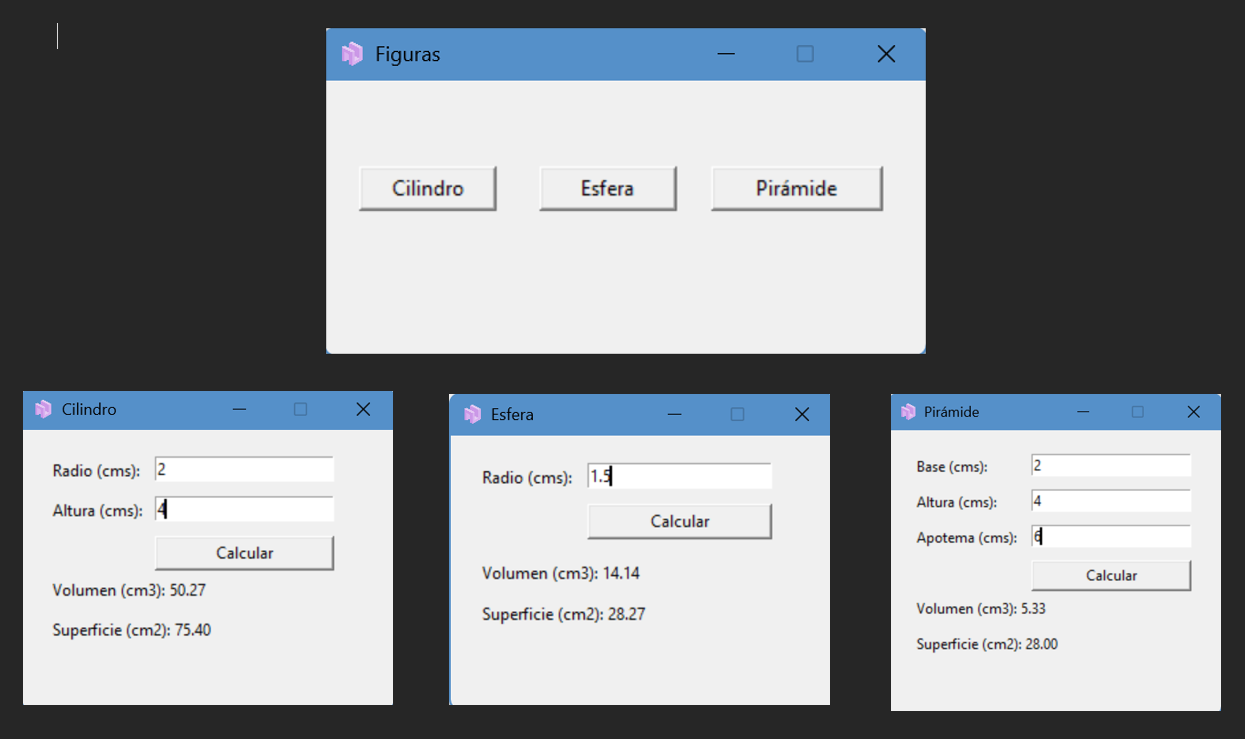

#### Diagrama de Clases

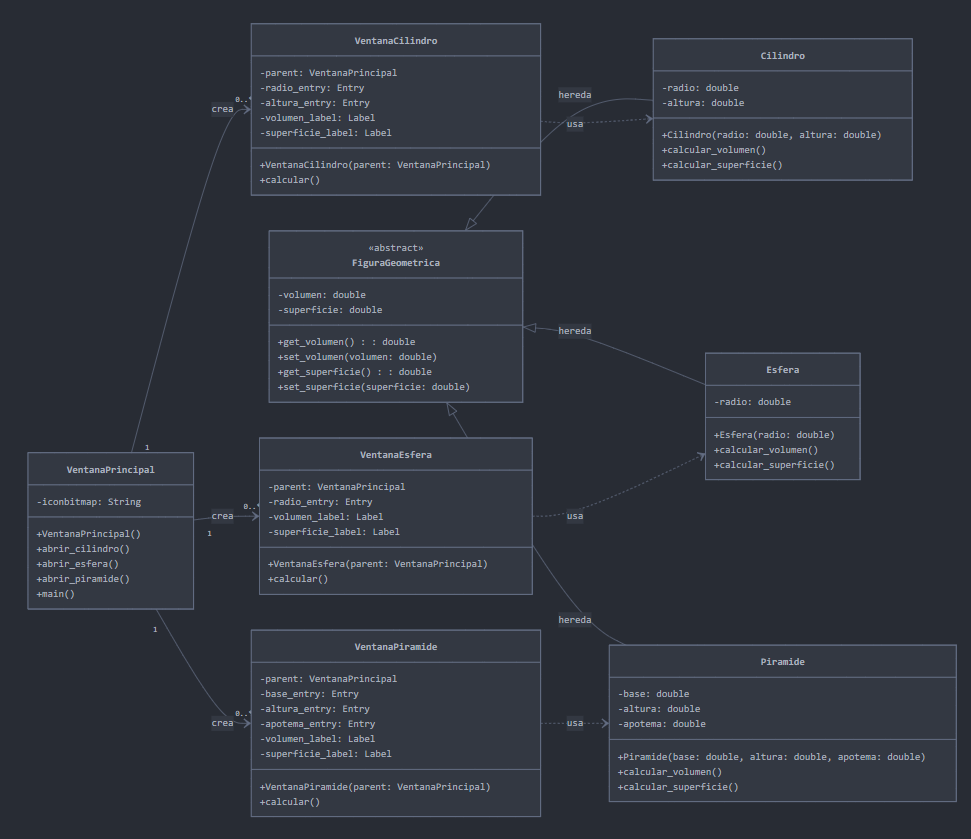

#### Codigo

In [11]:
import tkinter as tk
from tkinter import messagebox
import math

class FiguraGeometrica:
    def __init__(self):
        self._volumen = 0.0
        self._superficie = 0.0

    def get_volumen(self):
        return self._volumen

    def set_volumen(self, volumen):
        self._volumen = volumen

    def get_superficie(self):
        return self._superficie

    def set_superficie(self, superficie):
        self._superficie = superficie

class Cilindro(FiguraGeometrica):
    def __init__(self, radio, altura):
        super().__init__()
        self._radio = radio
        self._altura = altura
        self.calcular_volumen()
        self.calcular_superficie()

    def calcular_volumen(self):
        volumen = math.pi * self._altura * (self._radio ** 2)
        self.set_volumen(volumen)

    def calcular_superficie(self):
        area_lado_a = 2.0 * math.pi * self._radio * self._altura
        area_lado_b = 2.0 * math.pi * (self._radio ** 2)
        superficie = area_lado_a + area_lado_b
        self.set_superficie(superficie)

class Esfera(FiguraGeometrica):
    def __init__(self, radio):
        super().__init__()
        self._radio = radio
        self.calcular_volumen()
        self.calcular_superficie()

    def calcular_volumen(self):
        volumen = (4/3) * math.pi * (self._radio ** 3)
        self.set_volumen(volumen)

    def calcular_superficie(self):
        superficie = 4.0 * math.pi * (self._radio ** 2)
        self.set_superficie(superficie)

class Piramide(FiguraGeometrica):
    def __init__(self, base, altura, apotema):
        super().__init__()
        self._base = base
        self._altura = altura
        self._apotema = apotema
        self.calcular_volumen()
        self.calcular_superficie()

    def calcular_volumen(self):
        volumen = ((self._base ** 2) * self._altura) / 3.0
        self.set_volumen(volumen)

    def calcular_superficie(self):
        area_base = self._base ** 2
        area_lado = 2.0 * self._base * self._apotema
        superficie = area_base + area_lado
        self.set_superficie(superficie)

class VentanaCilindro(tk.Toplevel):
    def __init__(self, parent):
        super().__init__(parent)
        self.parent = parent
        self.title("Cilindro")
        self.iconbitmap('Figuras.ico')
        self.geometry("280x210")
        self.resizable(False, False)
        self.parent.eval(f'tk::PlaceWindow {str(self)} center')

        tk.Label(self, text="Radio (cms):").place(x=20, y=20)
        self.radio_entry = tk.Entry(self)
        self.radio_entry.place(x=100, y=20, width=135)

        tk.Label(self, text="Altura (cms):").place(x=20, y=50)
        self.altura_entry = tk.Entry(self)
        self.altura_entry.place(x=100, y=50, width=135)
        
        tk.Button(self, text="Calcular", command=self.calcular).place(x=100, y=80, width=135)

        self.volumen_label = tk.Label(self, text="Volumen (cm3):")
        self.volumen_label.place(x=20, y=110)
        
        self.superficie_label = tk.Label(self, text="Superficie (cm2):")
        self.superficie_label.place(x=20, y=140)
        
    def calcular(self):
        try:
            radio = float(self.radio_entry.get())
            altura = float(self.altura_entry.get())
            
            cilindro = Cilindro(radio, altura)
            
            self.volumen_label.config(text=f"Volumen (cm3): {cilindro.get_volumen():.2f}")
            self.superficie_label.config(text=f"Superficie (cm2): {cilindro.get_superficie():.2f}")
            
        except ValueError:
            messagebox.showerror("Error", "Campo nulo o error en formato de número.")

class VentanaEsfera(tk.Toplevel):
    def __init__(self, parent):
        super().__init__(parent)
        self.parent = parent
        self.title("Esfera")
        self.iconbitmap('Figuras.ico')
        self.geometry("280x200")
        self.resizable(False, False)
        self.parent.eval(f'tk::PlaceWindow {str(self)} center')

        tk.Label(self, text="Radio (cms):").place(x=20, y=20)
        self.radio_entry = tk.Entry(self)
        self.radio_entry.place(x=100, y=20, width=135)

        tk.Button(self, text="Calcular", command=self.calcular).place(x=100, y=50, width=135)

        self.volumen_label = tk.Label(self, text="Volumen (cm3):")
        self.volumen_label.place(x=20, y=90)
        
        self.superficie_label = tk.Label(self, text="Superficie (cm2):")
        self.superficie_label.place(x=20, y=120)

    def calcular(self):
        try:
            radio = float(self.radio_entry.get())
            esfera = Esfera(radio)
            
            self.volumen_label.config(text=f"Volumen (cm3): {esfera.get_volumen():.2f}")
            self.superficie_label.config(text=f"Superficie (cm2): {esfera.get_superficie():.2f}")

        except ValueError:
            messagebox.showerror("Error", "Campo nulo o error en formato de número.")

class VentanaPiramide(tk.Toplevel):
    def __init__(self, parent):
        super().__init__(parent)
        self.parent = parent
        self.title("Pirámide")
        self.iconbitmap('Figuras.ico')
        self.geometry("280x240")
        self.resizable(False, False)
        self.parent.eval(f'tk::PlaceWindow {str(self)} center')
        
        tk.Label(self, text="Base (cms):").place(x=20, y=20)
        self.base_entry = tk.Entry(self)
        self.base_entry.place(x=120, y=20, width=135)
        
        tk.Label(self, text="Altura (cms):").place(x=20, y=50)
        self.altura_entry = tk.Entry(self)
        self.altura_entry.place(x=120, y=50, width=135)
        
        tk.Label(self, text="Apotema (cms):").place(x=20, y=80)
        self.apotema_entry = tk.Entry(self)
        self.apotema_entry.place(x=120, y=80, width=135)

        tk.Button(self, text="Calcular", command=self.calcular).place(x=120, y=110, width=135)
        
        self.volumen_label = tk.Label(self, text="Volumen (cm3):")
        self.volumen_label.place(x=20, y=140)
        
        self.superficie_label = tk.Label(self, text="Superficie (cm2):")
        self.superficie_label.place(x=20, y=170)

    def calcular(self):
        try:
            base = float(self.base_entry.get())
            altura = float(self.altura_entry.get())
            apotema = float(self.apotema_entry.get())
            
            piramide = Piramide(base, altura, apotema)
            
            self.volumen_label.config(text=f"Volumen (cm3): {piramide.get_volumen():.2f}")
            self.superficie_label.config(text=f"Superficie (cm2): {piramide.get_superficie():.2f}")

        except ValueError:
            messagebox.showerror("Error", "Campo nulo o error en formato de número.")


class VentanaPrincipal(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Figuras")
        self.iconbitmap('Figuras.ico')
        self.geometry("350x160")
        self.resizable(False, False)
        self.eval('tk::PlaceWindow . center')

        tk.Button(self, text="Cilindro", command=self.abrir_cilindro).place(x=20, y=50, width=80)
        tk.Button(self, text="Esfera", command=self.abrir_esfera).place(x=125, y=50, width=80)
        tk.Button(self, text="Pirámide", command=self.abrir_piramide).place(x=225, y=50, width=100)
    
    def abrir_cilindro(self):
        VentanaCilindro(self)
        
    def abrir_esfera(self):
        VentanaEsfera(self)
        
    def abrir_piramide(self):
        VentanaPiramide(self)

if __name__ == "__main__":
    app = VentanaPrincipal()
    app.mainloop()